## Analysis of cost inflation in federal contracts

This notebook analyzes federal contract data [published here](https://open.canada.ca/data/en/dataset/d8f85d91-7dec-4fd1-8055-483b77225d8b). The data has been prepped and cleaned in another notebook, `data_prep.ipynb`, which standardizes vendor names, isolated contracts that were amended, and groups them by procurement ID to measure cost increases.

Note that priot to 2017, federal departmetns didn't regularly provide contracting data to the Treasury Board, which publishes the data. Numbers prior to that yeat should not be used in comparative analysis. This notebook sometimes looks at data from 2014 for context.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Load prepped data file

cost_changes = pd.read_parquet('../data/amended_contracts.parquet').query('fiscal_year >= 2014')

In [39]:
# Contracts with the largest cost changes

cost_changes.nlargest(10, 'change')[['procurement_id', 'vendor_name_norm', 
                                     'owner_org_title', 'description_en', 
                                     'fiscal_year', 'first_date', 'first_value', 
                                     'last_value', 'num_amendments', 'change']]

,procurement_id,vendor_name_norm,owner_org_title,description_en,fiscal_year,first_date,first_value,last_value,num_amendments,change
proc_unique,,,,,,,,,,
w3931-030182/001_dnd-mdn_calian,W3931-030182/001,CALIAN,National Defence,Dental services,2018,2017-11-01,"11,510.76","86,395,103.00",7,"750,459.50"
en57850979_pwgsc-tpsgc_oracle_canada,EN57850979,ORACLE CANADA,Public Services and Procurement Canada,License/Maintenance fees for Client Software,2017,2017-03-31,"19,757.07","72,333,334.18",19,"366,013.67"
eh90082051_pwgsc-tpsgc_pcl_constructors,EH90082051,PCL CONSTRUCTORS EASTERN,Public Services and Procurement Canada,Construction services,2019,2019-03-26,"68,985.00","226,431,120.10",8,"328,132.40"
en57830071_pwgsc-tpsgc_ibm_canada,EN57830071,IBM CANADA,Public Services and Procurement Canada,Client Software,2017,2017-02-17,"7,753.91","17,569,259.95",12,"226,485.81"
et25130917_pwgsc-tpsgc_ellisdon,ET25130917,ELLISDON,Public Services and Procurement Canada,Other professional services not elsewhere spec...,2019,2018-04-09,"210,000.00","144,112,868.49",9,"68,525.18"
2b0kbq0192_ssc-spc_dalian_enterprises,2B0KBQ0192,DALIAN ENTERPRISES,Shared Services Canada,Information Technology and Telecommunications ...,2021,2020-10-01,"14,421.00","9,492,000.00",2,"65,720.68"
x0190594/2_csps-efpc_desire2learn,X0190594/2,DESIRE2LEARN,Canada School of Public Service,Client software related to Distributed Computi...,2020,2020-03-20,"33,900.00","19,357,083.68",10,"57,000.54"
eh90090297_pwgsc-tpsgc_ellisdon,EH90090297,ELLISDON,Public Services and Procurement Canada,Construction services,2019,2018-09-26,"758,797.18","378,700,966.11",13,"49,808.06"
700350457_ssc-spc_inmarsat_solutions,700350457,INMARSAT SOLUTIONS CANADA,Shared Services Canada,Digital Chnnl Comm Svc for Combind Transmissn,2016,2016-03-30,"282,500.00","138,039,861.52",9,"48,763.67"


<Axes: >

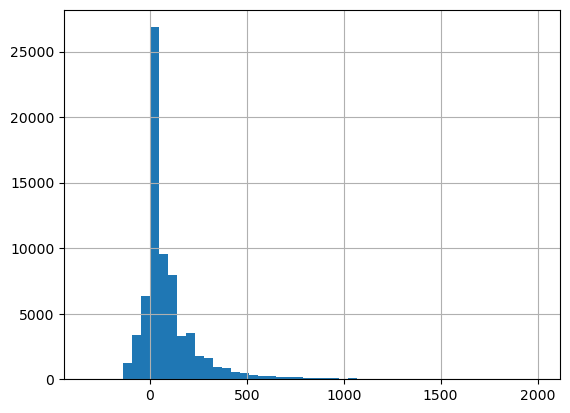

In [44]:
# Hisrogram of percentage increase in contracts (less than 2000% to exclude outliers)

cost_changes.query('change <= 2000').change.hist(bins=50)

In [47]:
# Yearly stats on contract price changes

cost_changes.groupby('fiscal_year').change.describe()

,count,mean,std,min,25%,50%,75%,max
fiscal_year,,,,,,,,
2014,"3,856.00",90.70,307.87,-100.00,0.00,21.05,98.78,"8,327.78"
2015,"3,817.00",116.26,718.68,-100.00,0.00,33.28,107.90,"37,288.71"
2016,"4,819.00",133.37,892.24,-100.00,0.00,33.56,127.61,"48,763.67"
2017,"6,819.00",225.58,"5,225.49",-100.00,1.05,49.09,161.04,"366,013.67"
2018,"9,335.00",216.71,"7,799.54",-100.00,0.00,46.07,135.15,"750,459.50"
2019,"9,109.00",178.28,"3,597.94",-100.00,0.00,38.97,124.98,"328,132.40"
2020,"9,140.00",128.68,826.72,-167.96,0.00,40.24,119.50,"57,000.54"
2021,"8,740.00",156.53,"1,091.54",-126.03,0.00,47.39,141.77,"65,720.68"
2022,"8,588.00",97.98,354.38,-200.00,0.00,36.38,105.05,"16,274.59"


In [46]:
# Yearly stats on number of amendments

cost_changes.groupby('fiscal_year').num_amendments.describe()

,count,mean,std,min,25%,50%,75%,max
fiscal_year,,,,,,,,
2014,"3,856.00",2.50,1.14,2.00,2.00,2.00,3.00,14.00
2015,"3,817.00",2.55,1.24,2.00,2.00,2.00,3.00,18.00
2016,"4,819.00",2.69,1.55,2.00,2.00,2.00,3.00,47.00
2017,"6,819.00",2.87,1.70,2.00,2.00,2.00,3.00,35.00
2018,"9,335.00",2.78,1.54,2.00,2.00,2.00,3.00,31.00
2019,"9,109.00",2.81,2.97,2.00,2.00,2.00,3.00,237.00
2020,"9,140.00",2.69,1.36,2.00,2.00,2.00,3.00,22.00
2021,"8,740.00",2.61,1.22,2.00,2.00,2.00,3.00,30.00
2022,"8,588.00",2.53,3.72,2.00,2.00,2.00,3.00,277.00


In [20]:
# Overall average cost inflation

all_prices = cost_changes.query('fiscal_year >= 2017')[['first_value', 'last_value']]

(all_prices.last_value.sum() - all_prices.first_value.sum()) / all_prices.first_value.sum()

0.495905439918201

<Axes: title={'center': 'Mean contract value change (%) by first fiscal year of contract'}, xlabel='fiscal_year'>

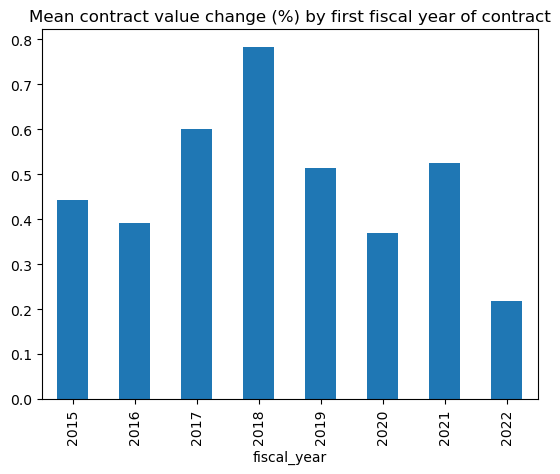

In [55]:
# Average cost change by fiscal year

(cost_changes
 .groupby('fiscal_year')
 .apply(lambda x: (x.last_value.sum() - x.first_value.sum()) / x.first_value.sum())
 .loc[2015:2022]
 .plot.bar(title='Mean contract value change (%) by first fiscal year of contract')
)

<Axes: title={'center': 'Average original and latest amended contract values'}, xlabel='fiscal_year'>

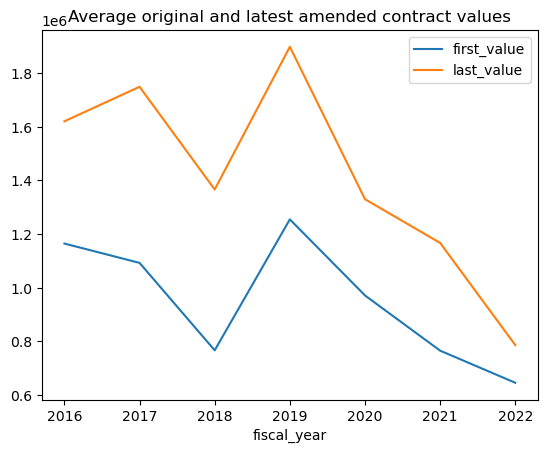

In [56]:
# Average first and final values of amended contract by fiscal year

cost_changes.groupby('fiscal_year')[['first_value', 'last_value']].mean().loc[2016:2022].plot(title = 'Average original and latest amended contract values')

In [57]:
# Stats on price difference between first and latest contract

(cost_changes
 .query('fiscal_year >= 2015')
 .groupby('fiscal_year')
 .apply(lambda x: (x.last_value - x.first_value)
                .agg(['mean', 'sum'])
       )
).sum()

mean        5,070,647.52
sum    33,310,067,540.82
dtype: float64

In [8]:
# Load descriptions of economic codes for proper classification of contracts. 
# Source: https://open.canada.ca/data/en/dataset/24969dcc-6618-4aa0-94d9-083e6400072a

codes_table_url = 'https://donnees-data.tpsgc-pwgsc.gc.ca/ba1/art-obj/art-obj-1920-eng.csv'

codes = pd.read_csv(codes_table_url)
codes.columns = codes.columns.str.split('\-[A-Z]').str[0]
codes = codes[['Sub-category_name', 'Reportingobject_name', 'Code_OBJ', 'Name', 'Description_OBJ']].set_index('Code_OBJ')
codes.loc['1283', 'Name'] = 'Desktop/personal/portable computers'
codes.loc['0582', 'Name'] = 'Software licence/maintenance fees'

In [15]:
codes

,Sub-category_name,Reportingobject_name,Name,Description_OBJ
Code_OBJ,,,,
0101,Personnel,Salaries and wages,Civilian regular time - Continuing employment,Basic salaries and wages for indeterminate civ...
0102,Personnel,Salaries and wages,"Civilian regular time - Part-time, seasonal, c...",Basic salaries and wages for civilian personne...
0103,Personnel,Salaries and wages,Civilian premium pay for work during non-stand...,Remuneration to civilian personnel that are en...
0104,Personnel,Salaries and wages,Civilian holiday pay in lieu of leave,Remuneration to civilian personnel as compensa...
0105,Personnel,Salaries and wages,Civilian overtime (for additional hours),Remuneration to civilian personnel for time wo...
...,...,...,...,...
8422,Government elimination of inter-entity transac...,Government elimination of inter-entity liabili...,Unmatured debt held by appropriation-dependant...,The amounts of Government securities held by a...
8425,Government elimination of inter-entity transac...,Government elimination of inter-entity liabili...,Specified purpose accounts - Due to appropriat...,Other amounts in the Consolidated Revenue Fund...
8440,Government elimination of inter-entity transac...,Government elimination of inter-entity asset b...,"Elimination of inter-entity loans, investments...","The loans, investments or advances held by the..."


In [9]:
# Join code description to contract counts per category, filter categories with at least 500 contracts

code_counts = cost_changes.groupby('economic_object_code').change.agg(['count', 'median', 'mean'])
code_counts = (pd.concat([code_counts, codes], axis=1)
               .dropna(subset=['Name'])
               .query('count >= 500')
               .sort_values('median', ascending=False)
              )
code_counts.head(13)

,count,median,mean,Sub-category_name,Reportingobject_name,Name,Description_OBJ
0452,549.00,200.00,262.92,Professional and special services,Health and welfare services,Welfare services,Welfare services purchased from social and rel...
0811,982.00,102.90,150.16,Professional and special services,Business services,Contracted building cleaning,Cleaning services for buildings such as office...
0473,"8,991.00",100.81,221.67,Professional and special services,Informatics services,Information technology and telecommunications ...,Professional contracting and consulting servic...
0451,553.00,100.00,165.69,Professional and special services,Health and welfare services,Other health services not elsewhere specified,Other health services not elsewhere specified ...
0582,630.00,100.00,789.89,Rentals,Rental of informatics equipment,Software licence/maintenance fees,"License, maintenance/renewal fees for client s..."
0494,"1,103.00",71.47,127.56,Professional and special services,Interpretation and translation services,Translation services,Services for language translation.
0401,523.00,63.78,111.81,Professional and special services,Business services,Accounting and audit services,Accounting and audit services including financ...
0431,588.00,63.14,119.82,Professional and special services,Scientific and research services,Scientific consultants,Consultant or contract workers services acquir...
0420,990.00,60.24,189.92,Professional and special services,Engineering and architectural services,Engineering services not elsewhere specified,Engineering services acquired that are not cla...
0813,"1,987.00",58.93,96.89,Professional and special services,Temporary help services,Temporary help services,Temporary help services acquired for general o...


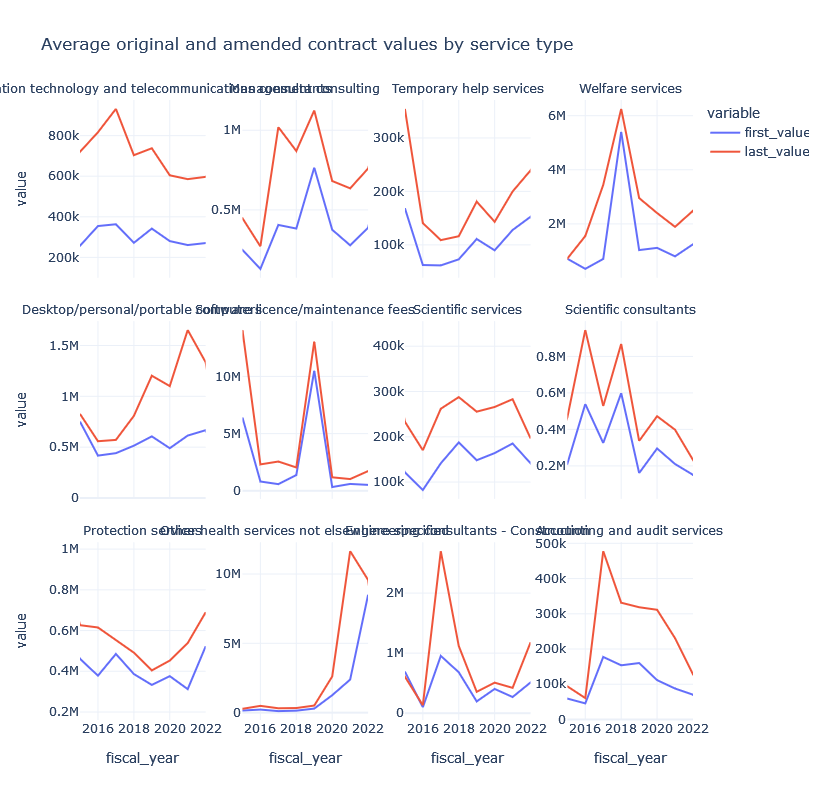

In [19]:
# Visualize average start and end values of selected contract types

sel_codes = ['0473', '0491', '0813', '0452', '1283', '0582' , 
             '0430', '0431', '0460', '0451', '0422', '0401']

first_last_by_type = (cost_changes
 .query('first_value < 4000000000')
 .groupby(['fiscal_year', 'economic_object_code'])
 [['first_value', 'last_value']]
 .mean()
 .loc[(slice(None), sel_codes), :]
 .reset_index()
 .merge(codes['Name'], left_on = 'economic_object_code', right_index=True)
)

fig = px.line(first_last_by_type, x='fiscal_year', 
       y=['first_value', 'last_value'], facet_col='Name', 
       facet_col_wrap=4, height=800, range_x = (2015, 2022),
       hover_data=['economic_object_code'], facet_col_spacing=0.06, 
       template='plotly_white',
       title = 'Average original and amended contract values by service type')

fig.update_yaxes(showticklabels=True, matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))


In [13]:
# How many contracts were amended vs. all others by type

contracts_per_code = (contracts
                      .query('fiscal_year >= 2017')
                      .groupby('economic_object_code')
                      .proc_unique.nunique()
                     )

(cost_changes
 .query('fiscal_year >= 2017')
 .groupby('economic_object_code')
 .agg({'change' : ['count', 'median'], 'num_amendments':'sum'})
 .droplevel(0, axis=1)
 .query('count >=100')
 .assign(total_contracts = contracts_per_code)
 .assign(amended_ratio = lambda x: x['count'] / x.total_contracts)
 .sort_values('amended_ratio', ascending=False)
 .merge(codes['Name'], left_on = 'economic_object_code', right_index=True)
 .head(25)
)

,count,median,sum,total_contracts,amended_ratio,Name
economic_object_code,,,,,,
0452,365,222.44,1578,647,0.56,Welfare services
1316,221,13.12,664,464,0.48,"Roads, highways and airport runways"
0473,7683,100.00,24956,17107,0.45,Information technology and telecommunications ...
0453,297,105.74,863,791,0.38,Physicians and surgeons
0421,670,42.95,2195,1862,0.36,Architectural services
1358,146,16.06,529,431,0.34,Other institutional buildings
0230,362,130.99,960,1108,0.33,Voice communications services
0813,1588,52.44,3836,5026,0.32,Temporary help services
1364,186,17.17,493,596,0.31,Laboratories


In [21]:
# Top 20 vendors per service type, by median contract value change

(cost_changes[cost_changes.economic_object_code.isin(sel_codes)]
 .groupby(['economic_object_code', 'vendor_name_norm'])
 .change
 .agg(['count', 'median', 'mean'])
 .reset_index()
 .query('count >= 15')
 .sort_values(['economic_object_code', 'median'], ascending=[1,0])
 .groupby('economic_object_code')
 .head(20)
 .merge(codes['Name'], left_on = 'economic_object_code', right_index=True)

)#.to_clipboard(index=False)

,economic_object_code,vendor_name_norm,count,median,mean,Name
63,0401,PRICEWATERHOUSE COOPERS,26,126.83,155.88,Accounting and audit services
36,0401,GOVERNMENT SOLUTIONS GROUP,26,100.00,180.85,Accounting and audit services
47,0401,KPMG,15,84.53,110.50,Accounting and audit services
21,0401,DELOITTE,35,78.98,127.48,Accounting and audit services
72,0401,RAYMOND CHABOT GRANT THORNTON,67,75.00,133.50,Accounting and audit services
...,...,...,...,...,...,...
5158,1283,CDW CANADA,40,4.04,"1,055.56",Desktop/personal/portable computers
5248,1283,PURESPIRIT SOLUTIONS,15,3.03,41.45,Desktop/personal/portable computers
5230,1283,NORTHERN MICRO,91,2.62,522.32,Desktop/personal/portable computers
5229,1283,NISHA TECHNOLOGIES,73,0.85,144.53,Desktop/personal/portable computers


In [23]:
# Focus on IT and mangement consulting

it_cons = ['0473', '0491', '1283']

it = cost_changes[cost_changes.economic_object_code.isin(it_cons)]

(it.groupby(['economic_object_code', 'fiscal_year'])
 .agg({'num_amendments' : ['sum', 'mean'],
       'change' : 'median'})
 .unstack(0)
)

num_amendments                           change         \
                                sum            mean           median          
economic_object_code           0473  0491 1283 0473 0491 1283   0473   0491   
fiscal_year                                                                   
2014                           1167   265   67 3.21 2.55 3.05 117.79  54.65   
2015                           1161   278   29 3.38 2.48 3.22 126.67  50.48   
2016                           1981   405   65 3.30 2.66 3.10 115.87  39.11   
2017                           2715   798  115 3.09 2.77 2.35 100.00  52.37   
2018                           3483  1241  240 3.19 2.86 2.79 116.59  51.51   
2019                           4129  1319  290 3.67 2.77 2.69 117.07  50.00   
2020                           3912  1330  219 3.40 2.73 2.41 101.50  53.24   
2021                           4135  1659  239 3.27 2.82 2.54 126.87  59.68   
2022                           4371  1336  167 3.39 2.58 2.26  97.84  59.38   
2023                           2072   623  118 2.49 2.23 2.07  99.20  49.69   
2024                            139    14    8 2.57 2.00 2.00   0.00 105.52   

                            
                            
economic_object_code  1283  
fiscal_year                 
2014                  0.00  
2015                  5.06  
2016                 60.43  
2017                  2.83  
2018                  8.43  
2019                 18.57  
2020                 10.00  
2021                  4.35  
2022                  9.92  
2023                  0.00  
2024                  3.67

In [24]:
# Overall price increase per code

it.groupby('economic_object_code').apply(lambda x: (x.last_value.sum() - x.first_value.sum()) / x.first_value.sum())

economic_object_code
0473   1.34
0491   0.83
1283   0.96
dtype: float64

In [25]:
# Stats on IT contracts by department. Sort by median cost increase

(it.groupby('owner_org_title')
 .agg({'num_amendments' : ['count','sum', 'mean'],
       'change' : 'median'})
 .sort_values(('change', 'median'), ascending=False)
 .droplevel(0, 1)
 .query('count > 100')
)

,count,sum,mean,median
owner_org_title,,,,
Royal Canadian Mounted Police,387,1181,3.05,199.44
Canadian Food Inspection Agency,126,422,3.35,194.01
Parks Canada,103,326,3.17,132.40
Agriculture and Agri-Food Canada,281,807,2.87,125.00
"Innovation, Science and Economic Development Canada",720,1837,2.55,114.83
Transport Canada,590,2038,3.45,111.95
Employment and Social Development Canada,1673,5701,3.41,109.09
Canada Revenue Agency,1721,6840,3.97,104.52
Global Affairs Canada,1125,3585,3.19,101.50


In [26]:
# Stats by vendor and department

(it.groupby(['owner_org_title', 'vendor_name_norm'])
 .agg({'num_amendments' : ['count','sum', 'mean'],
       'change' : 'median'})
)#.to_clipboard()

num_amendments  \
                                                                                                               count   
owner_org_title                                    vendor_name_norm                                                    
Accessibility Standards Canada                     ADIRONDACK IN JOINT VENTURE WITH AMITA ARTEMP A...              1   
                                                   KSAR ASSOCIATES                                                 1   
                                                   OPENCONCEPT CONSULTING                                          1   
                                                   THE RIGHT DOOR CONSULTING SOLUTIONS                             2   
Administrative Tribunals Support Service of Can... 49 SOLUTIONS                                                    1   
...                                                                                                              ...   
Treasury Board of Canada Secretariat               WESTBURY NATIONAL SHOW SYSTEMS                                  1   
                                                   WOLTERS KLUWER CANADA                                           1   
Veterans Affairs Canada                            CONTRACT COMMUNITY                                              1   
                                                   ORBIS RISK CONSULTING                                           1   
Western Economic Diversification Canada            EPERFORMANCE                                                    1   

                                                                                                           \
                                                                                                      sum   
owner_org_title                                    vendor_name_norm                                         
Accessibility Standards Canada                     ADIRONDACK IN JOINT VENTURE WITH AMITA ARTEMP A...   2   
                                                   KSAR ASSOCIATES                                      2   
                                                   OPENCONCEPT CONSULTING                               2   
                                                   THE RIGHT DOOR CONSULTING SOLUTIONS                  4   
Administrative Tribunals Support Service of Can... 49 SOLUTIONS                                         7   
...                                                                                                    ..   
Treasury Board of Canada Secretariat               WESTBURY NATIONAL SHOW SYSTEMS                       2   
                                                   WOLTERS KLUWER CANADA                                2   
Veterans Affairs Canada                            CONTRACT COMMUNITY                                   2   
                                                   ORBIS RISK CONSULTING                                3   
Western Economic Diversification Canada            EPERFORMANCE                                         2   

                                                                                                            \
                                                                                                      mean   
owner_org_title                                    vendor_name_norm                                          
Accessibility Standards Canada                     ADIRONDACK IN JOINT VENTURE WITH AMITA ARTEMP A... 2.00   
                                                   KSAR ASSOCIATES                                    2.00   
                                                   OPENCONCEPT CONSULTING                             2.00   
                                                   THE RIGHT DOOR CONSULTING SOLUTIONS                2.00   
Administrative Tribunals Support Service of Can... 49 SOLUTIONS                                       7.00   
...           

### Analysis by government department


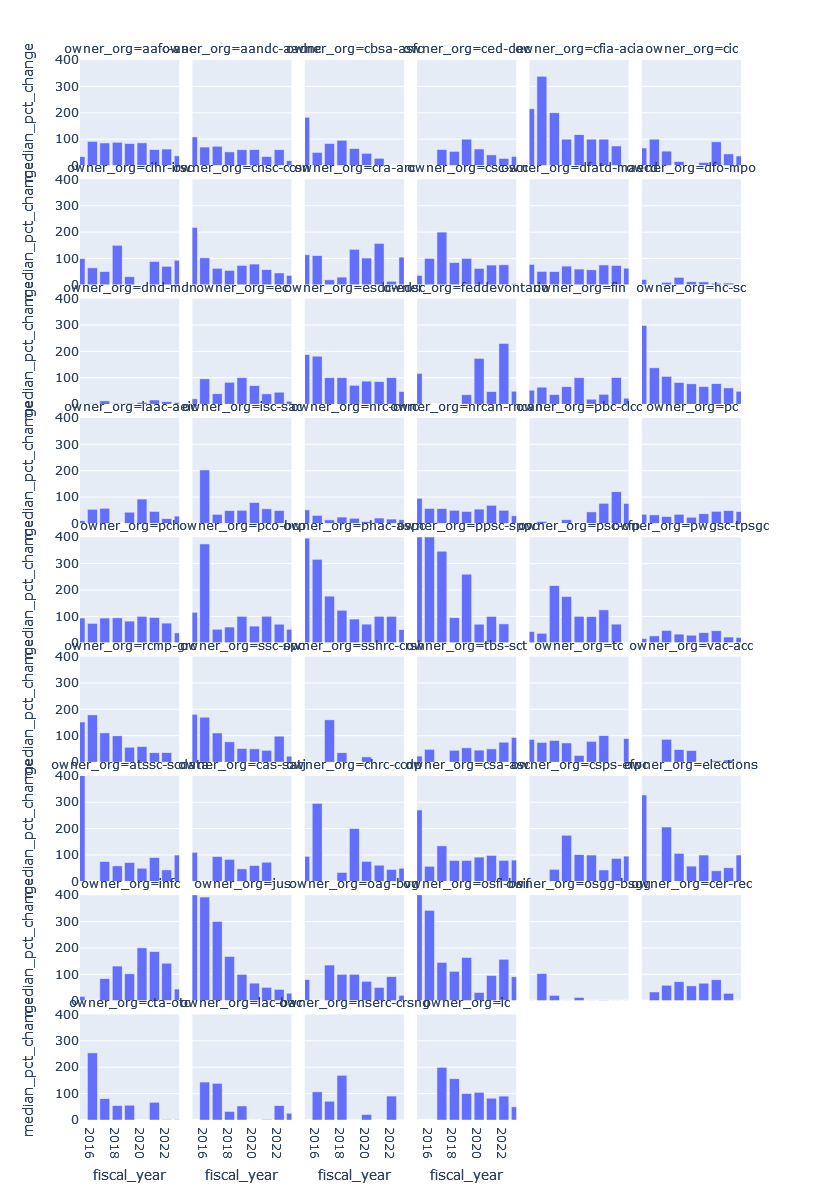

In [98]:
# Median contract % change over time

changes_by_dept = (cost_changes
 .groupby(['fiscal_year', 'owner_org'])
 .change.median()
 .unstack()
 .dropna(thresh=8, axis=1)
 .stack()
 .reset_index(name='median_pct_change')                  
)

px.bar(changes_by_dept, x='fiscal_year', 
       y='median_pct_change', facet_col='owner_org', 
       facet_col_wrap=6, facet_row_spacing=0.013, height=1200, range_y=(0, 400),
       range_x=(2015,2023))

In [138]:
# Number of amended contracts, median % change, and total amendments by dept

contracts_per_dept = (contracts
                      .query('fiscal_year >= 2107')
                      .groupby('owner_org')
                      .proc_unique.nunique()
                     )

(cost_changes
 .query('contract_date >= "2017-01-01"')
 .groupby('owner_org')
 .agg({'change' : ['count', 'median'], 'num_amendments':'sum'})
 .droplevel(0, axis=1)
 .query('count >=100')
 .assign(total_contracts = contracts_per_dept)
 .assign(amended_ratio = lambda x: x['count'] / x.total_contracts)
 .sort_values('amended_ratio', ascending=False)
 .head(20)
)

,count,median,sum,total_contracts,amended_ratio
owner_org,,,,,
cra-arc,1829,83.33,5900,4972,0.37
cic,1667,36.49,4383,4677,0.36
esdc-edsc,2342,92.24,7291,8049,0.29
atssc-scdata,152,67.39,441,619,0.25
csa-asc,319,100.00,891,1637,0.19
infc,124,107.28,349,675,0.18
lac-bac,144,33.81,360,792,0.18
pwgsc-tpsgc,6437,39.43,18641,36519,0.18
fin,126,51.25,321,750,0.17


In [8]:
# Stats by vendor

(cost_changes.groupby('vendor_name_norm')
 .agg({'change' : 'median', 'num_amendments' : ['count', 'sum', 'max']})
 .droplevel(0, axis=1)
 .query('count>=10')
 .sort_values('median',ascending=False)
 .head(20)
)

,median,count,sum,max
vendor_name_norm,,,,
AMERESCO CANADA,"1,788.59",10,47,17
GROUPE SECURITE GARDA,448.48,14,31,3
METOCEAN TELEMATICS,388.52,12,58,10
VF WORLDWIDE HOLDINGS,364.69,10,37,7
LES ENTREPRISES PREBBEL,331.54,11,47,7
MOERAE SOLUTIONS,315.69,14,50,8
MULTI OPTION NURSING,312.17,11,37,5
BRETON MICHEL MD,279.26,14,50,7
EMERION COFOMO FMC IN JOINT VENTURE,256.31,25,79,17
